# Shapley Values

Assume there's a predictive model have a $\vec{x}\space(x1, x2, x3)$ as the input variables, and $y$ as the corresponding variabe.
Below is the sample ouput:

| x1 | x2 | x3 | y | $\hat y$ |
| --- | --- | --- | --- | --- |
| 1 | 0 | 0 | 5 | 2.5 |
| 0 | 1 | 0 | 10 | 10 |
| 0 | 0 | 1 | 15 | 17.5 |
| 1 | 1 | 0 | 20 | 22.5 |
| 1 | 0 | 1 | 30 | 30 |
| 0 | 1 | 1 | 40 | 37.5 |
| 1 | 1 | 1 | 50 | 50 |

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
sample_X = pd.DataFrame(data={"x1": [1,0,0,1,1,0,1], "x2":[0,1,0,1,0,1,1], "x3":[0,0,1,0,1,1,1]})
sample_y = pd.DataFrame(data={"y": [5,10,15,20,30,40,50]})
clf = LinearRegression().fit(sample_X, sample_y)
y_hat = clf.predict(sample_X)
y_hat

array([[ 2.5],
       [10. ],
       [17.5],
       [22.5],
       [30. ],
       [37.5],
       [50. ]])

In [7]:
import shap
import numpy as np
explainer = shap.Explainer(clf, sample_X)
shap_values = explainer(sample_X)

In [8]:
shap_values[0,:].values.sum() + shap_values[0,:].base_values
print(np.sum(shap_values.values, axis = 0)) # 0 mean distribution of shapley values per feature, dummy
print(np.sum(shap_values.values, axis = 1) + shap_values[0,:].base_values) # feature contribution = y_hat - base_value, efficiency

[5.32907052e-15 3.55271368e-15 3.55271368e-15]
[ 2.5 10.  17.5 22.5 30.  37.5 50. ]


# Feature Importance

SHAP feature importance measured as the mean absolute Shapley values. 

X3 was the most important feature, changing the predicted value on average by 14. 

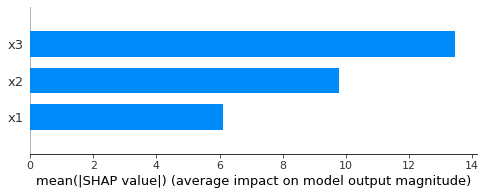

In [9]:
#Feature Importance 
shap.summary_plot(shap_values.values,sample_X, plot_type="bar")

# Force plot

The SHAP force plot shows us exactly which features had the most influence on the model's prediction for a single observation.

The prediction for the first row have been intrepreted as below. 

In [5]:
shap.force_plot(shap_values[0,:], sample_X.iloc[0,:])